In [1]:
import json
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
def load_json(filename: str):
    with open(filename) as json_file:
        return json.load(json_file)

In [3]:
gt = load_json("test/gt_annotations.json")
detections = load_json("test/detections.json")

In [4]:
det_139 = [det['bbox'] for det in detections if det['image_id'] == 139]
print(det_139)

[[417.3332824707031, 159.27003479003906, 47.66064453125, 143.00193786621094], [383.5909118652344, 172.0777587890625, 17.959075927734375, 36.94813537597656], [457.8359069824219, 158.88027954101562, 9.89764404296875, 8.771820068359375]]


In [5]:
gt_139 = [anno['bbox'] for anno in gt['annotations'] if anno['image_id'] == 139]
print(gt_139)

[[412.8, 157.61, 53.05, 138.01], [384.43, 172.21, 15.12, 35.74]]


In [6]:
image_139 = gt['images'][1]
print(image_139)

{'license': 2, 'file_name': '000000000139.jpg', 'coco_url': 'http://images.cocodataset.org/val2017/000000000139.jpg', 'height': 426, 'width': 640, 'date_captured': '2013-11-21 01:34:01', 'flickr_url': 'http://farm9.staticflickr.com/8035/8024364858_9c41dc1666_z.jpg', 'id': 139}


In [7]:
empty_image = np.full((image_139['height'], image_139['width'], 3), 255, dtype=np.uint8)
print(empty_image.shape, empty_image.dtype)

(426, 640, 3) uint8


In [8]:
def draw_boxes(arr, color):
    for row in arr:
        rect = patches.Rectangle((row[0], row[1]), row[2], row[3], linewidth=1, edgecolor=color, facecolor="none")
        ax.add_patch(rect)

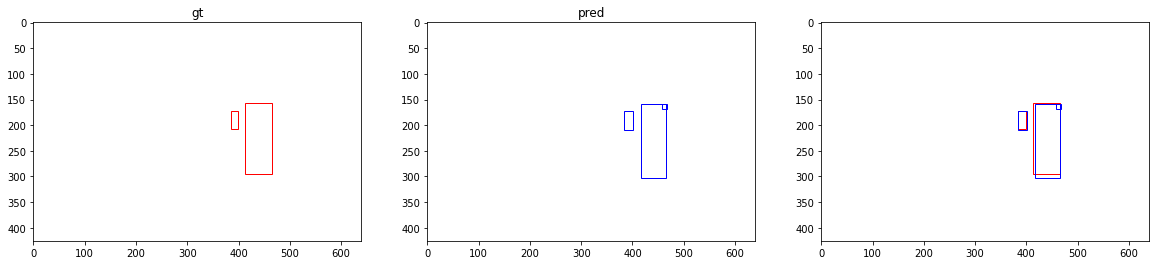

In [9]:
fig, axs = plt.subplots(ncols=3, squeeze=False, figsize=(20,10))

ax = axs[0, 0]
ax.imshow(empty_image)
ax.set_title('gt')
draw_boxes(gt_139, 'r')        

ax = axs[0, 1]
ax.imshow(empty_image)
ax.set_title('pred')
draw_boxes(det_139, 'b')        

ax = axs[0, 2]
ax.imshow(empty_image)
draw_boxes(gt_139, 'r')        
draw_boxes(det_139, 'b')        

plt.show()

In [12]:
import contextlib
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval
import io

In [14]:
with contextlib.redirect_stdout(io.StringIO()):
    coco_api = COCO("test/gt_annotations.json")

detections = load_json("test/detections.json")
with contextlib.redirect_stdout(io.StringIO()):
    coco_dt = coco_api.loadRes(detections)
    coco_eval = COCOeval(coco_api, coco_dt, "bbox")
    coco_eval.evaluate()
    coco_eval.accumulate()

In [15]:
coco_eval.summarize()

 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.750
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.700
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.400
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.750
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = -1.000
